In [1]:
# in the name of God

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
college = pd.read_csv('College.csv').values
college_ = college[:, 2:]

In [4]:
def kmeans(k, iteration):
    min_error = math.inf
    min_index = -1
    whole_center = list()
    for i in range(iteration):
        centers_index = np.random.randint(college_.shape[0], size=k)
        centers = college_[centers_index]
        new_centers = np.zeros([k, college_.shape[1]])

        distance_cluster = np.zeros((college_.shape[0], k))
        while True:
            for c in range(k):
                center = centers[c]
                distance_cluster[:, c] = np.linalg.norm(np.array(college_ - center, dtype=np.float64), axis=1)
            clusters = np.argmin(distance_cluster, axis=1)
            for c in range(k):
                new_centers[c] = np.mean(college_[clusters == c], 0)
            if (centers != new_centers).all():
                break
            centers = np.copy(new_centers)
        whole_center.append(centers)
        
        #find best iteration
        sum_error = 0
        for c in range(k):
            center = centers[c]
            sum_error += np.sum(np.linalg.norm(np.array(college_[clusters == c] - center, dtype=np.float64), axis=1))
        if sum_error <= min_error:
            min_error = sum_error
            min_index = i
            
            
    result_centers = whole_center[min_index]
    for c in range(k):
        center = result_centers[c]
        distance_cluster[:, c] = np.linalg.norm(np.array(college_ - center, dtype=np.float64), axis=1)
    clusters = np.argmin(distance_cluster, axis=1)
    return result_centers, clusters, min_error

print(kmeans(2,10))


(array([[947, 798, 266, 36, 68, 1274, 471, 10850, 5150, 550, 800, 77, 93,
        13.6, 24, 8797, 61],
       [5244, 3782, 1930, 12, 37, 11561, 7443, 8786, 2964, 570, 1980, 79,
        87, 15.9, 8, 8094, 38]], dtype=object), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
k = 2
ms, kmeans_clusters, error = kmeans(2, 5)
sigmas = list()
for j in range(k):
    s = np.dot((college_[kmeans_clusters == j] - ms[j]).T, college_[kmeans_clusters == j] - ms[j])
    sigmas.append(s)

In [7]:
from scipy import random, linalg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal as mvn



k = 2
max_iteration = 100
iter_ = 0
n, d = college_.shape
ll_new = 0.0
ps = np.random.rand(k)
ll_old = 0

while True:
    iter_+=1
    if iter_ > max_iteration:
        break

    norms = np.zeros((k, n))
    for i in range(n):
        for j in range(k):
            norms[j, i] = mvn(ms[j], sigmas[j]).pdf(college_[i])

    # E step
    ws = np.zeros((k, n))
    for i in range(n):
        s = np.dot(ps, norms[:, i])
        for j in range(k):
            ws[j, i] = ps[j] * norms[j, i] / s

    # M step
    for j in range(k):
        row = ws[j]
        s = np.dot(row, np.ones(n))

        ms[j] = np.dot(row, college_) / s

        dif = college_ - np.tile(ms[j], (n, 1))
        sigmas[j] = np.dot(np.multiply(row.reshape(n, 1), dif).T, dif) / s

        ps[j] = s / n
    
    log_vector = np.log(np.array([np.dot(ps.T, ws[:, i]) for i in np.arange(n)]))
    ll_new = np.dot(log_vector.T, np.ones(n))

    
    if np.abs(ll_new - ll_old) < 0.01:
        break
    ll_old = ll_new

print('number of iterations: ', iter_)
print('m: ', ms)
print('cov: ')
print(sigmas)
print('likelihood: ')
print(ll_new)


number of iterations:  25
m:  [[1309.0201427836253 985.4116442284494 358.76594907524185
  25.267389620034777 53.22466503408682 1459.8992252122196
  365.99991325925663 10849.502188854894 4358.244393660891
  524.0535737334002 1215.4475040580026 69.45091516816817
  76.88579266274704 13.632516564475138 24.60307426800973
  8976.006376704134 66.12950342986294]
 [6769.853661359626 4319.409608794221 1717.6910870470133
  32.65930592068992 61.522580277024005 8686.757179089394
  1944.6066940734474 9530.499088243041 4355.927903275547
  605.7663885022365 1619.358712424669 79.80501804236765 85.9738886524053
  15.107523982819936 18.60484413558041 11183.30275346708
  63.980221180611984]]
cov: 
[array([[951771.7389993437, 643634.3318033095, 170601.7577024888,
        3979.6832346062606, 5562.853477567421, 661752.5089861461,
        61432.58268852335, 1436041.8517520737, 379473.12806907773,
        9513.6440624089, -35841.24246519443, 6678.425676488625,
        5841.570592983104, 237.3972908886217, 1819

In [8]:
k = 2
distances_cluster = np.zeros(k)
gmm_clusters = np.zeros(college_.shape[0])
for i in np.arange(college_.shape[0]):
    row = college_[i]
    
    for j in range(k):
        distances_cluster[j] = np.dot(np.dot((row - ms[j]).T, sigmas[j].T), row - ms[j])
        

    gmm_clusters[i] = np.argmin(distances_cluster)
gmm_clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [9]:
# purity

def purity(k_number, c_number, expected, real):
    s = 0
    for i in range(k_number):
        max_index = 0
        max_value = 0
        for j in range(c_number):
            classes = real[np.where(expected == i)[0]]
            f = np.where(classes == j)[0].shape[0]
            if f > max_value:
                max_index = c_number
                max_value = f
        s += max_value
    return s/expected.shape[0]

In [10]:
def tarkib(n,k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

    
def rand_index(k_number, c_number, expected, real):
    s = 0
    tp = 0
    for i in range(k_number):
        for j in range(c_number):
            classes = real[np.where(expected == i)[0]]
            if np.where(classes == j)[0].shape[0] > 1:
                tp += tarkib(np.where(classes == j)[0].shape[0], 2)
    
    
    cluster0 = np.where(expected == 0)[0]
    cluster1 = np.where(expected == 1)[0]
    fn = np.where(cluster0 == 0)[0].shape[0] * np.where(cluster1 == 1)[0].shape[0]
    fn += np.where(cluster0 == 1)[0].shape[0] * np.where(cluster1 == 0)[0].shape[0]
    return (fn+tp)/tarkib(expected.shape[0],2)
        


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=4>
    در این دیتاست چون تعداد داده‌هایی که برچسب yes دارند خیلی بیشتر از داده‌های با برچست no است در الگوریتم gmm بهتر از الگوریتم kmeans عمل می‌کند چون در kmeans به نوعی با انتساب داده‌ها به دو کلاستر براساس مرکز کلاستر با یک خط که عمودمنصف خط عبوری از دو مرکز است، تقسیم می‌کند و به نوعی نمی‌تواند توزیع نایکتواخت را به درستی خوشه‌بندی کند ولی gmm با در نظرگیری واریانس حول هر مرکز می‌تواند دو خوشه که نایکنواخت توزیع شده را به خوبی خوشه‌بندی کند که در نتایج مشهود است.
</font>
</div>

In [11]:
real_cluster = np.empty(college.shape[0])
real_cluster[college[:,1]== 'No'] = 0
real_cluster[college[:,1] == 'Yes'] = 1

print('Purity for kmeans : ')
print(purity(2, 2, kmeans_clusters,real_cluster))
print('Purity for gmm : ')
print(purity(2, 2, gmm_clusters,real_cluster))


print('Rand index for kmeans : ')
print(rand_index(2, 2, kmeans_clusters,real_cluster))
print('Rand index for gmm : ')
print(rand_index(2, 2, gmm_clusters,real_cluster))




Purity for kmeans : 
0.7271557271557272
Purity for gmm : 
0.7284427284427284
Rand index for kmeans : 
0.3136667595430482
Rand index for gmm : 
0.5994241664344757


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=4>
elbow برای kmeans زمانی است که خطای sse به اندازه کافی کوچکتر شده است و بعد آن با افزایش k میزان کاهش خطای sse کمتر است و کم کم به صفر میل می‌کند. برای شکل زیر sse تقریبا در k = 3  اتفاق افتاده  است.
</font>
</div>

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  # Remove the CWD from sys.path while we load stuff.


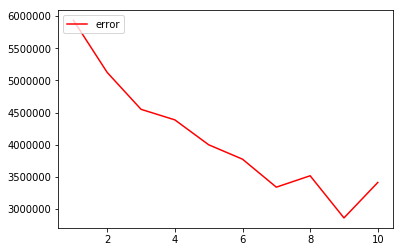

In [13]:
import matplotlib.pyplot as plt
import numpy as np

ks = [i for i in range(1,11)]
errors = list()
for k in ks:
    x,y,z = kmeans(k, 10)
    errors.append(z)
    
plt.gca().set_color_cycle(['red'])
plt.plot(ks, errors)
plt.legend(['error'], loc='upper left')
plt.show()